
<a href="https://colab.research.google.com/github/Argentan/DMA_LAB2/blob/master/tutoriales/03_manejo_de_datos-pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Pandas - Continuación

## Combinando Data Frames

In [ ]:
import numpy as np
import pandas as pd

### Append

In [ ]:
Nombres = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres

In [ ]:
Nombres2 = pd.DataFrame({'id':[5,6], 'Nombre': ["Julia", "Alberto"]})
Nombres2

In [ ]:
Nombres.append(Nombres2)

### Merge

#### Por una columna

In [ ]:
Nombres = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres

In [ ]:
Edad = pd.DataFrame({'id':[1,2,3,4], 'Edad':[11,21,8,15]})
Edad

In [ ]:
pd.merge(Nombres, Edad)

#### Especificando columna comun

In [ ]:
Nombres = pd.DataFrame({'id_Nombres':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Edad = pd.DataFrame({'id_edades':[1,2,3,4], 'Edad':[11,21,8,15]})

In [ ]:
pd.merge(Nombres, Edad, left_on='id_Nombres', right_on='id_edades')

### How (inner, outer, left, right,...)

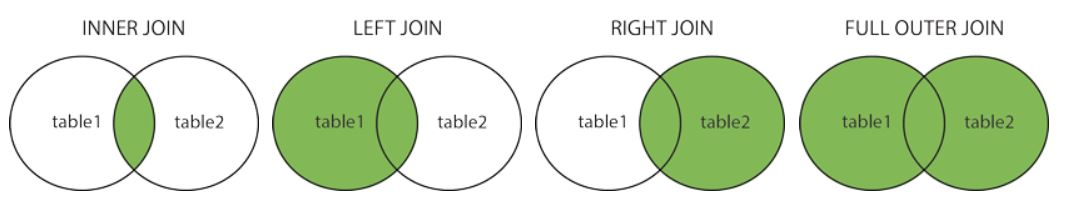

In [ ]:
Nombres = pd.DataFrame({'id':[3,4,5,6], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Edad = pd.DataFrame({'id':[1,2,3,4], 'Edad':[11,21,8,15]})

In [ ]:
pd.merge(Nombres, Edad, how='inner')

In [ ]:
pd.merge(Nombres, Edad, how='outer')

In [ ]:
pd.merge(Nombres, Edad, how='left')

In [ ]:
pd.merge(Nombres, Edad, how='right')

In [ ]:
Nombres.join(Edad, on="id", rsuffix="_edad")

In [ ]:
Nombres.join(Edad.set_index("id"), on="id")

## Agrupaciones



In [ ]:
data = pd.read_csv("../data/titanic.csv", index_col="PassengerId")

In [ ]:
data.head()

Puedo usar un agrupador por Columna

In [ ]:
data['Survived'].sum()

In [ ]:
data['Age'].mean()

Y también puedo agrupar por fila, por ejemplo, para construir otra columna

In [ ]:
data['NumFam'] = data[['SibSp', 'Parch']].sum(axis=1)
data[['SibSp', 'Parch','NumFam']].head(10)


### Group By

Las agrupaciones sirven para hacer cálculos sobre subconjuntos de los datos, generalmente tienen tres partes:

1. Definir los grupos
2. Aplicar un cálculo
3. Combinar los resultados

In [ ]:
agrupado = data.groupby(["Pclass", "Sex"])
agrupado

In [ ]:
agrupado.Survived.mean()

In [ ]:
agrupado.Survived.agg(
    media="mean",
    media_2= np.mean,
    varianza= "var",
    cantidad= "count",
    cant2= len
)

In [ ]:
data.groupby("Survived")[['Age', 'SibSp', 'Parch', 'NumFam', 'Fare']].mean()

### Tablas de contingencia

Las tablas de contingencia asemejan las tablas dinámicas de excel, sirven apra ver inteacciones entre variables



In [ ]:
pd.crosstab(data.Age.isnull(), data.Survived)

In [ ]:
pd.crosstab(data.Age.isnull(), data.Survived).apply(lambda x: x/x.sum(), axis=0)

In [ ]:
pd.crosstab(data.Pclass, data.Survived, values=data.Fare, aggfunc=np.mean)

In [ ]:
pd.crosstab(pd.qcut(data.Age, 10), data.Sex, values=data.Survived, aggfunc=np.mean)

In [ ]:
pd.crosstab(pd.cut(data.Age, range(0, 100, 10)), data.Sex, values=data.Survived, aggfunc=np.mean)

## Graficación Simple con plot()

In [ ]:
data.sort_values('Age').plot(x = 'Age', y = 'Fare')

In [ ]:
pd.crosstab(pd.cut(data.Age, range(0, 100, 10)), data.Sex, values=data.Survived, aggfunc=np.mean).plot(kind = 'bar')

## Ejercicios

### Combinación de Objetos

Crear los siguientes objetos:

In [ ]:
Nombres_1 = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres_2 = pd.DataFrame({'id':[5,6,7,8], 'Nombre': ["Martin", "Lucas", "Julieta", "Pablo"]})
Edad_1 = pd.DataFrame({'id_edades':[3,4,5,6], 'Edad':[11,21,8,15]})

Concatenar los objetos Nombres_1 y Nombres_2 en un objeto llamado Nombres_3

Hacer un Merge de Nombre_3 y Edad_1, quedandonos solo con las filas que coincidan

Hacer un Merge de Nombre_3 y Edad_1, quedandonos solo con todas las filas de Nombre_3

### Agrupaciones

¿Cuál es el precio promedio que se pagó por un Ticket? (Fare)


¿Cuál es el precio promedio que se pagó en cada Categoría? (Pclass) 

Construir una Tabla de Contingencia usando Genero (Sex) y Categoría (Pclass) para calcular el porcentaje de supervivencia

Construir una Tabla de Contingencia usando el Genero y el precio de un Ticket en 5 rangos para calcular el porcentaje de supervivencia

Graficar el porcentaje de supervivencia por Categoría y Género